In [ ]:
!pip install scikit-image watermark -q

In [ ]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-03-26T23:45:19.183891+00:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 2.0.2
cv2       : 4.11.0
matplotlib: 3.10.0



## Input

In [ ]:
!wget https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#https://opencollection.brooklynmuseum.org/archives/image/51611

--2025-03-26 23:45:22--  https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
Resolving d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)... 13.35.90.35, 13.35.90.214, 13.35.90.44, ...
Connecting to d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)|13.35.90.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30340 (30K) [image/jpeg]
Saving to: ‘S03i3165l01.jpg.2’

S03i3165l01.jpg.2   100%[===================>]  29.63K  --.-KB/s    in 0.007s  

2025-03-26 23:45:22 (4.03 MB/s) - ‘S03i3165l01.jpg.2’ saved [30340/30340]



## Leer imagenes

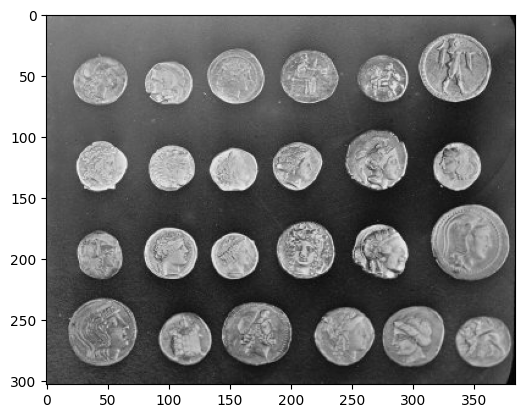

In [ ]:
img = imread('S03i3165l01.jpg')
plt.imshow(img)
plt.show()

In [ ]:
type(img)

numpy.ndarray

## Funcion

In [ ]:
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))

data_img(img)

Tamaño =  (303, 384, 3)
Max  =  252
Min  =  1


## Recortar

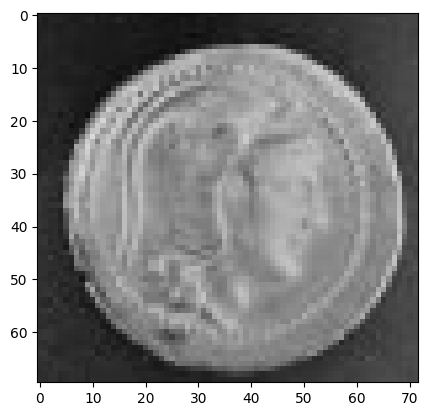

In [ ]:
# Primero alto, despues ancho
img_cropped = img[150:220, 310:382]
plt.imshow(img_cropped)

In [ ]:
data_img(img_cropped)

Tamaño =  (70, 72, 3)
Max  =  218
Min  =  12


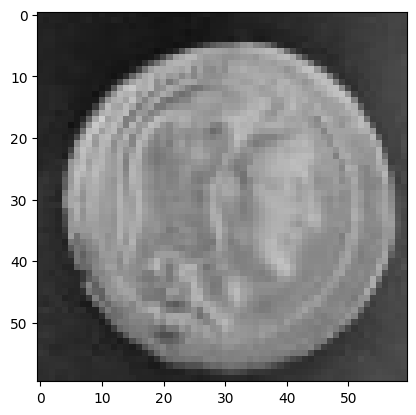

In [ ]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (60, 60))
plt.imshow(img_resize)

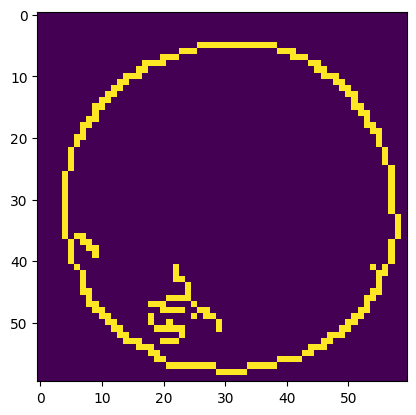

In [ ]:
img_canny = cv2.Canny(img_resize, 150, 300)
plt.imshow(img_canny)

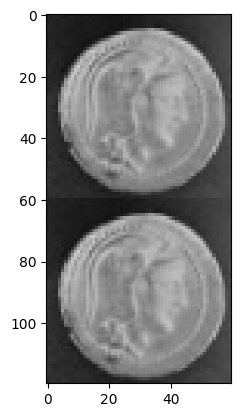

In [ ]:
# Apilado vertical
ver = np.vstack((img_resize, img_resize))
plt.imshow(ver);

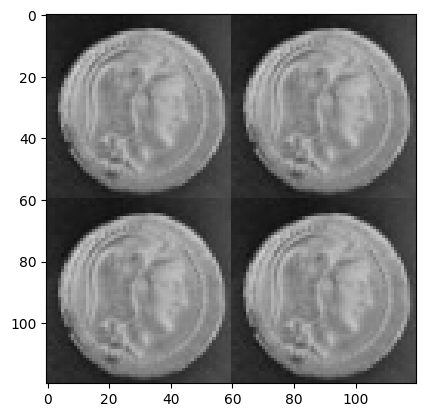

In [ ]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
hor2 = np.hstack((ver, ver))
plt.imshow(hor2);

## Seleccion del primer canal de color

In [ ]:
X = img_cropped[:,:,0]
data_img(X)

Tamaño =  (70, 72)
Max  =  218
Min  =  12


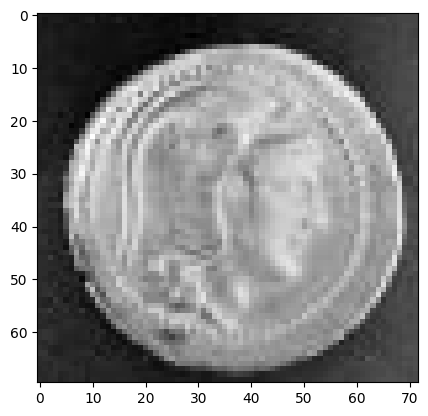

In [ ]:
plt.imshow(X,cmap='gray')
plt.show()

In [ ]:
img_cropped[1:1]

array([], shape=(0, 72, 3), dtype=uint8)

In [ ]:
X[2:2]

array([], shape=(0, 72), dtype=uint8)

In [ ]:
pixel1 = (0, 0, 0)
pixel2 = (255,0, 255)
pixel3 = (0, 0, 0)

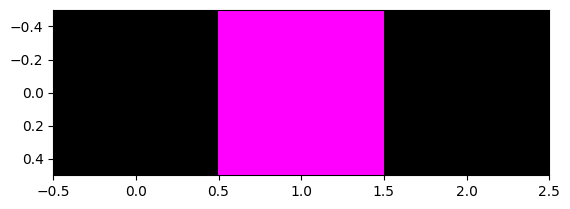

In [ ]:
plt.imshow([[pixel1, pixel2, pixel3]]);

In [ ]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/239096.jpg

--2025-03-26 23:45:02--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/239096.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24335 (24K) [image/jpeg]
Saving to: ‘239096.jpg.1’

239096.jpg.1        100%[===================>]  23.76K  --.-KB/s    in 0.07s   

2025-03-26 23:45:03 (345 KB/s) - ‘239096.jpg.1’ saved [24335/24335]



In [ ]:
img = cv2.imread('239096.jpg')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(321, 481, 3)

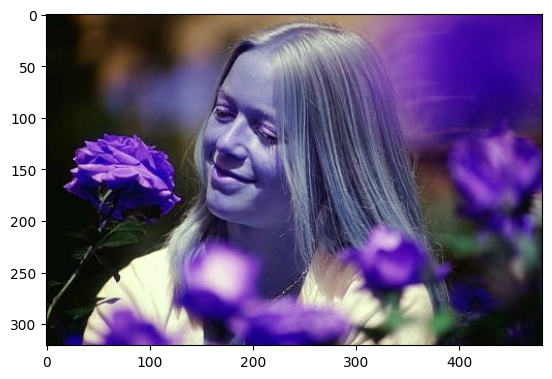

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img[0, 0]

array([ 6, 10,  5], dtype=uint8)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img_rgb[0, 0]

array([ 5, 10,  6], dtype=uint8)

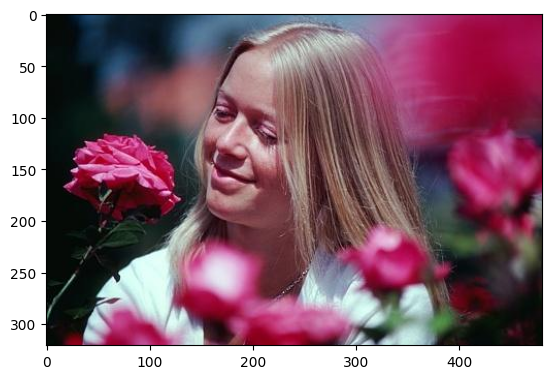

In [ ]:
plt.imshow(img_rgb)
plt.show()

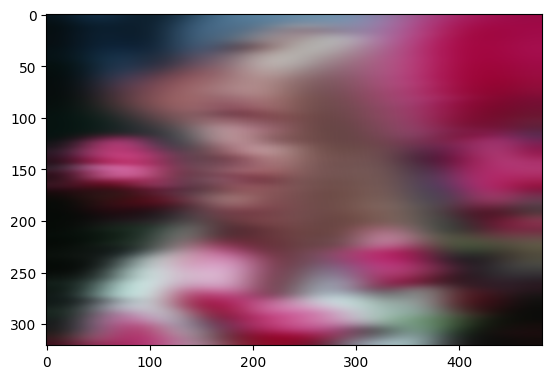

In [ ]:
img_blur = cv2.GaussianBlur(img_rgb, (151, 13), 0)
plt.imshow(img_blur)
plt.show()

In [ ]:
import skimage as ski

In [ ]:
image = ski.data.coins()

<ipython-input-125-7a6f7ce19235>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(image)
<ipython-input-125-7a6f7ce19235>:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.show()


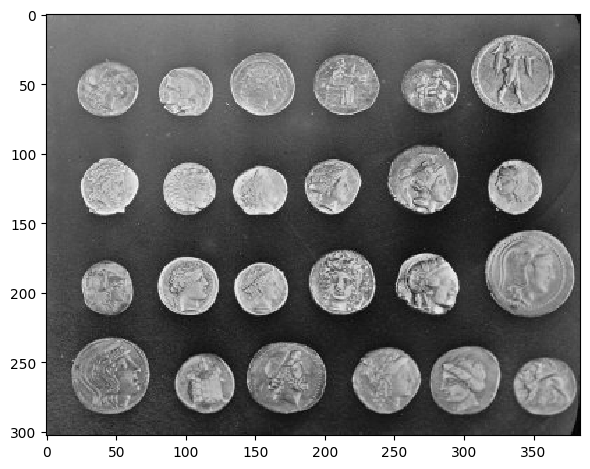

In [ ]:
ski.io.imshow(image)
ski.io.show()

<ipython-input-126-8df9c9fbc8c7>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(edges)
<ipython-input-126-8df9c9fbc8c7>:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.show()


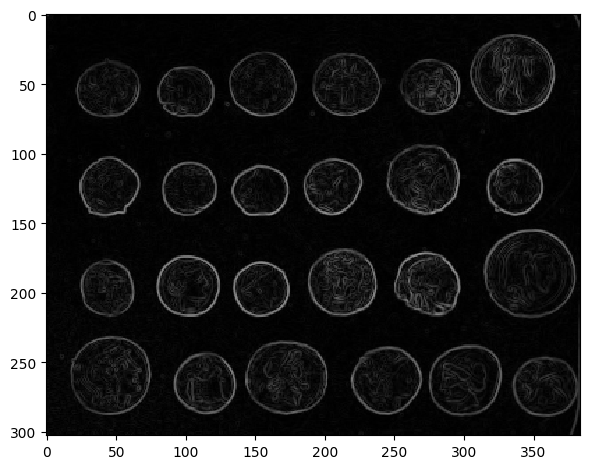

In [ ]:
edges = ski.filters.sobel(image)
ski.io.imshow(edges)
ski.io.show()